In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from pycytominer.cyto_utils import infer_cp_features

sys.path.insert(0, "../../scripts")
from utils import load_data
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
data_splits = ["test"]
data_dict = load_data(data_splits)

<IPython.core.display.Javascript object>

In [4]:
# Prepare data for training
meta_features = infer_cp_features(data_dict["test"], metadata=True)
cp_features = infer_cp_features(data_dict["test"])

test_features_df = data_dict["test"].reindex(cp_features, axis="columns")
test_meta_df = data_dict["test"].reindex(meta_features, axis="columns")

<IPython.core.display.Javascript object>

In [5]:
components = np.arange(1, 51)
reconstructions = []
for component in components:
    pca = PCA(n_components=component, random_state = 10)
    principalComponents = pca.fit_transform(test_features_df)
    reconstruction = pca.inverse_transform(principalComponents)
    reconstructions.append(reconstruction)


<IPython.core.display.Javascript object>

In [6]:
frobenius_norms = []
for reconstruction in reconstructions:
    frobenius_norms.append(
        (sum(sum((np.array(test_features_df) - reconstruction) ** 2))) ** 0.5
    )

<IPython.core.display.Javascript object>

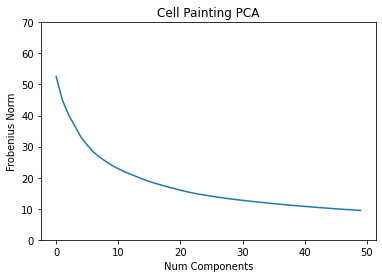

<IPython.core.display.Javascript object>

In [7]:
plt.plot(frobenius_norms)
plt.xlabel("Num Components")
plt.ylabel("Frobenius Norm")
plt.title("Cell Painting PCA")
plt.ylim(0, 70)
plt.show()

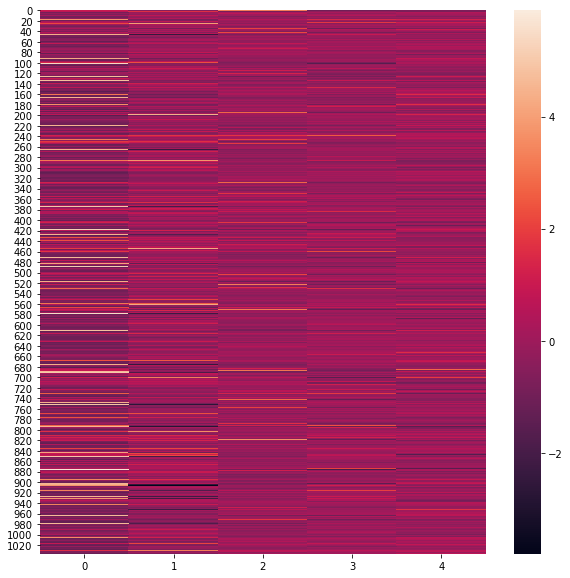

<IPython.core.display.Javascript object>

In [8]:
pca_5comp = PCA(n_components=5, random_state=10)
principalComponents_5comp = pca_5comp.fit_transform(test_features_df)
fig, ax = plt.subplots(figsize=(10, 10))
# plt.title("Latent Space Heatmap for PCA")
sns.heatmap(principalComponents_5comp)
plt.show()

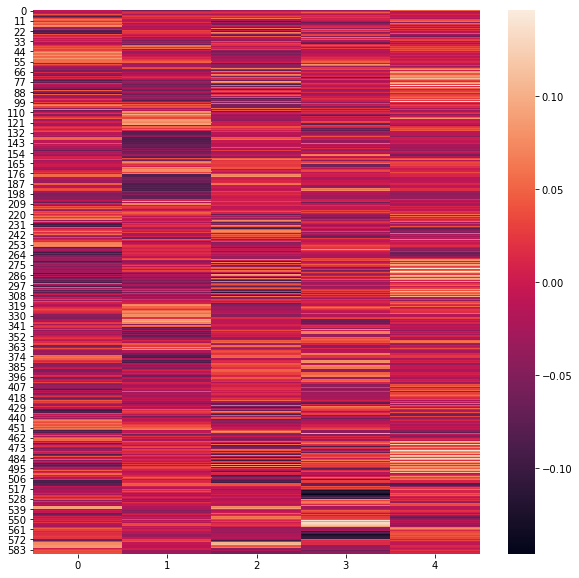

<IPython.core.display.Javascript object>

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pca_5comp.components_.transpose())
plt.show()

